In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [ ]:
transform = transforms.Compose([transforms.ToTensor()
                              ])
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
testset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [ ]:
import torch.nn.functional as F
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
class Mlpmodel(nn.Module):
    def initialize_weights(self,type):
       if type=='uniform':
          torch.nn.init.uniform_(self.fc1.weight)
          torch.nn.init.uniform_(self.fc2.weight)
          torch.nn.init.uniform_(self.fc3.weight)
       elif type=='normal':
          torch.nn.init.normal_(self.fc1.weight)
          torch.nn.init.normal_(self.fc2.weight)
          torch.nn.init.normal_(self.fc3.weight) 
       elif type=='xavier':
          torch.nn.init.xavier_uniform_(self.fc1.weight)
          torch.nn.init.xavier_uniform_(self.fc2.weight)
          torch.nn.init.xavier_uniform_(self.fc3.weight) 
    def __init__(self,ip_f,type='normal'):
        super(Mlpmodel,self).__init__()
        self.fc1 = nn.Linear(ip_f, 128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,10)
        self.initialize_weights(type)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x=nn.LogSoftmax(dim=1)(x)
        return x

In [ ]:
import matplotlib.pyplot as plt
def train(model,epoch,optimizer,scheduler):
    loss_list=[]
    epochs_list=np.arange(1,epoch+1)
    for i in range(1,epoch+1):
        running_loss=0.0
        for j, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            inputs = inputs.view(inputs.size(0), -1)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        loss_list.append(running_loss/len(trainloader))
     
        scheduler.step()
    plt.plot(epochs_list,loss_list)
    plt.title('Loss vs epoch')
    plt.xlabel('epoch')
    plt.ylabel('Loss')
    plt.show()

In [ ]:
def test(model):
    total = 0
    correct = 0
    with torch.no_grad():
        running_loss = 0.0
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            images = images.view(images.size(0), -1)
            outputs = model(images)
            total += labels.size(0)
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

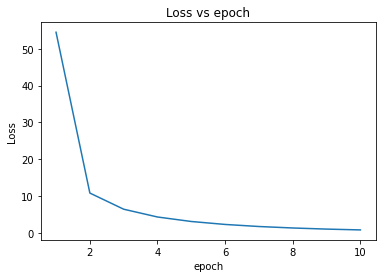

Accuracy of the network on the 10000 test images: 91 %


In [ ]:
# adam 
mlp= Mlpmodel(28*28)
mlp.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp.parameters(),  lr=0.001)
train(mlp,10,optimizer,None)
test(mlp)

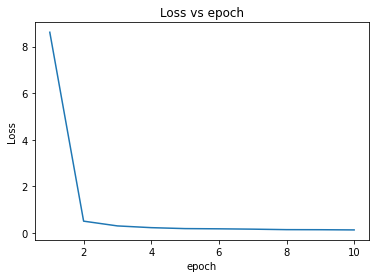

Accuracy of the network on the 10000 test images: 96 %


In [ ]:
# RMSprop 
mlp= Mlpmodel(28*28)
mlp.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(mlp.parameters())
train(mlp,10,optimizer,None)
test(mlp)

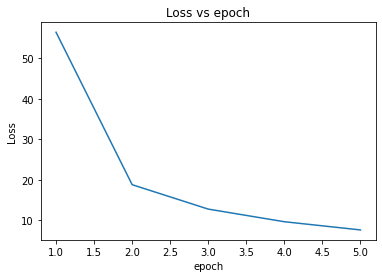

Accuracy of the network on the 10000 test images: 81 %


In [ ]:
# SGD 
mlp= Mlpmodel(28*28)
mlp.to(device)
criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(mlp.parameters(),lr=0.001)
train(mlp,5,optimizer,None)
test(mlp)

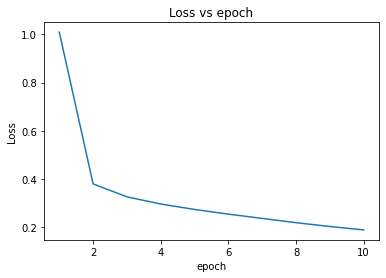

Accuracy of the network on the 10000 test images: 94 %


In [ ]:
# SGD with momentum
mlp= Mlpmodel()
mlp.to(device)
criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(mlp.parameters(),momentum=0.9,lr=0.001)
train(mlp,10,optimizer,None)
test(mlp)

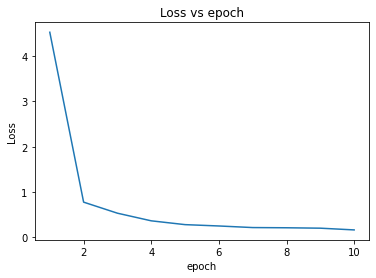

Accuracy of the network on the 10000 test images: 95 %


In [ ]:
#  normal weight initilization
mlp= Mlpmodel(28*28,'normal')
mlp.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(mlp.parameters())
train(mlp,10,optimizer,None)
test(mlp)

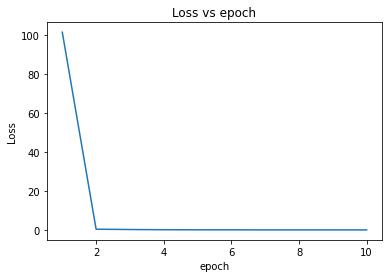

Accuracy of the network on the 10000 test images: 96 %


In [ ]:
#  uniform weight initilization
mlp= Mlpmodel(28*28,'uniform')
mlp.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(mlp.parameters())
train(mlp,10,optimizer,None)
test(mlp)

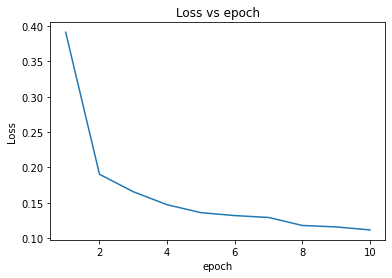

Accuracy of the network on the 10000 test images: 95 %


In [ ]:
#  xavier weight initilization
mlp= Mlpmodel(28*28,'xavier')
mlp.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(mlp.parameters())
train(mlp,10,optimizer,None)
test(mlp)

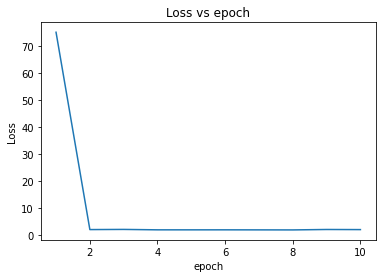

For learning rate i= 0.1
Accuracy of the network on the 10000 test images: 11 %


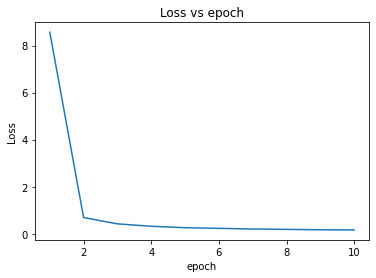

For learning rate i= 0.01
Accuracy of the network on the 10000 test images: 94 %


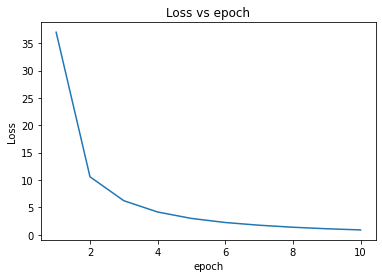

For learning rate i= 0.001
Accuracy of the network on the 10000 test images: 92 %


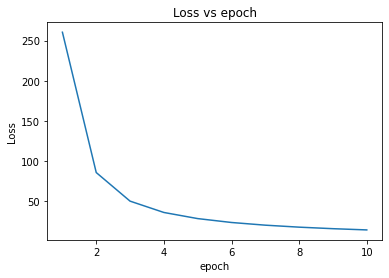

For learning rate i= 0.0001
Accuracy of the network on the 10000 test images: 85 %


In [ ]:
#  varying learning rate
lr = [0.1,0.01,0.001,0.0001]
for i in lr:
    mlp= Mlpmodel(28*28,'normal')
    mlp.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.RMSprop(mlp.parameters(),lr=i)
    train(mlp,10,optimizer,None)
    print('For learning rate i=' ,i)
    test(mlp)
    '----------------'

Adjusting learning rate of group 0 to 1.0000e-02.
Adjusting learning rate of group 0 to 9.9900e-03.
Adjusting learning rate of group 0 to 9.9800e-03.
Adjusting learning rate of group 0 to 9.9700e-03.
Adjusting learning rate of group 0 to 9.9601e-03.
Adjusting learning rate of group 0 to 9.9501e-03.
Adjusting learning rate of group 0 to 9.9401e-03.
Adjusting learning rate of group 0 to 9.9302e-03.
Adjusting learning rate of group 0 to 9.9203e-03.
Adjusting learning rate of group 0 to 9.9104e-03.
Adjusting learning rate of group 0 to 9.9004e-03.


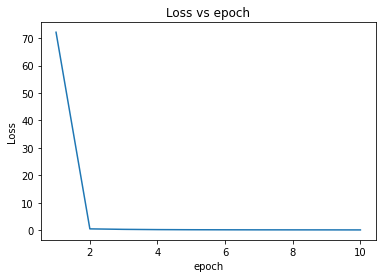

Accuracy of the network on the 10000 test images: 95 %


In [ ]:
#  Exponential annealing
mlp= Mlpmodel(28*28,'uniform')
mlp.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(mlp.parameters())
scheduler=torch.optim.lr_scheduler.ExponentialLR(optimizer,  0.999, last_epoch=-1, verbose=True)
train(mlp,10,optimizer,scheduler)
test(mlp)

**Part2**

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

class AE(nn.Module):
    def __init__(self,bootleneck_params):
        super(AE, self).__init__()
        self.bootleneck_params=  bootleneck_params
        #Encoder
        self.enc1 = nn.Linear(in_features=784, out_features=300)
         # Input image (28*28 = 784)
        self.enc2 = nn.Linear(in_features=300, out_features=100)
        self.enc3 = nn.Linear(in_features=100, out_features=32)
        self.enc4 = nn.Linear(in_features=32, out_features= self.bootleneck_params)

        #Decoder 
        self.dec1 = nn.Linear(in_features =self.bootleneck_params, out_features=32)
        self.dec2 = nn.Linear(in_features=32, out_features=100)
        self.dec3 = nn.Linear(in_features=100, out_features=300)
        self.dec4 = nn.Linear(in_features=300, out_features=784)

    def forward(self, x):
        x = F.relu(self.enc1(x))
        x = F.relu(self.enc2(x))
        x = F.relu(self.enc3(x))
        x = F.relu(self.enc4(x))

        y = F.relu(self.dec1(x))
        y = F.relu(self.dec2(y))
        y = F.relu(self.dec3(y))
        y = self.dec4(y)

        return x,y

cuda:0


In [ ]:
ae=AE(16)
ae.to(device)
criterion=nn.MSELoss()
optimizer = torch.optim.RMSprop(mlp.parameters())
for i in range(1,11):
        running_loss=0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            inputs = inputs.view(inputs.size(0), -1)
            optimizer.zero_grad()
            x,y = ae(inputs)
            loss = criterion(y, inputs)
            loss.backward()
            optimizer.step()

In [ ]:
mlp=Mlpmodel(16)
mlp.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(mlp.parameters())
for epoch in range(1,11):
        running_loss=0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            inputs = inputs.view(inputs.size(0), -1)
            optimizer.zero_grad()
            x,y = ae(inputs)
            outputs = mlp(x)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss=loss.item()
        print('Epoch {} of {}, Train Loss: {:.3f}'.format(epoch, 10, running_loss/len(trainloader)))

Epoch 1 of 10, Train Loss: 0.002
Epoch 2 of 10, Train Loss: 0.002
Epoch 3 of 10, Train Loss: 0.002
Epoch 4 of 10, Train Loss: 0.002
Epoch 5 of 10, Train Loss: 0.002
Epoch 6 of 10, Train Loss: 0.001
Epoch 7 of 10, Train Loss: 0.002
Epoch 8 of 10, Train Loss: 0.002
Epoch 9 of 10, Train Loss: 0.002
Epoch 10 of 10, Train Loss: 0.001


In [ ]:
correct=0.0
total=0.0
for data in testloader:
    images, labels = data[0].to(device), data[1].to(device)
    images = images.view(images.size(0), -1)
    x,y=ae(images)
    outputs = mlp(x)
    total += labels.size(0)
    _, predicted = torch.max(outputs.data, 1)
    correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 93 %


In [ ]:
print('Accuracy of mlp using rms prop  is 97%')
print('Accuracy of mlp using auto encoder featurs  is 93%')